In [1]:
import time

# work with directories
import os 
from pathlib import Path 

# datetime
import datetime as dt

# work with data
import numpy as np
import pandas as pd
# import pandas_datareader.data as web # not needed for this code

# visualize data
import matplotlib.pyplot as plt

# create bag of word vector
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# This file was generated in '3_Final_Data_Preprocessing.ipynb'.
#merged_df = pd.read_pickle(('4. clean_corpus/clean_corpus_2015_PublicFirms.pkl'))
merged_df = pd.read_csv("data/merged.csv").drop(columns=["Unnamed: 0"])

merged_df.head()

,text,patent_id,ticker,numpat_total,issue_date,sector,clean_corpus
0,FIELD OF THE INVENTION\n\nThe present inventio...,7640720,DE,6229,1/5/2010,Industrials,field invent present invent relat float platfo...
1,FIELD OF THE INVENTION\n\nThe present inventio...,7640721,DE,6229,1/5/2010,Industrials,field invent present invent relat tractor/bal ...
2,BACKGROUND OF THE INVENTION\n\n1. Field of the...,7640730,F,19346,1/5/2010,Consumer Discretionary,background invent 1. field invent present inve...
3,FIELD\n\nThe present description relates to a ...,7640744,F,19346,1/5/2010,Consumer Discretionary,field present descript relat method compens la...
4,BACKGROUND AND SUMMARY\n\nSome internal combus...,7640794,F,19346,1/5/2010,Consumer Discretionary,background summari intern combust engin util b...


In [4]:
# we select only text data from clean_corpus column and use patent_id as the index for each patent information
corpus = merged_df.set_index('patent_id')['clean_corpus']
# corpus = corpus.iloc[:1000]
corpus.iloc[:5]

patent_id
7640720    field invent present invent relat float platfo...
7640721    field invent present invent relat tractor/bal ...
7640730    background invent 1. field invent present inve...
7640744    field present descript relat method compens la...
7640794    background summari intern combust engin util b...
Name: clean_corpus, dtype: object

In [5]:
# remove rows with no patent data information
corpus.dropna(axis=0, inplace=True)
corpus.iloc[:5]

patent_id
7640720    field invent present invent relat float platfo...
7640721    field invent present invent relat tractor/bal ...
7640730    background invent 1. field invent present inve...
7640744    field present descript relat method compens la...
7640794    background summari intern combust engin util b...
Name: clean_corpus, dtype: object

In [6]:
# create tfidf vector of the clean corpus
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tfidf_vector = tfidf_vectorizer.fit_transform(corpus)
tfidf_vector

<80246x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 9148209 stored elements in Compressed Sparse Row format>

## TOPIC MODELLING
The data that we collect in our count or TFIDF matrix does not include the complexity of the natural language which has many latent (hidden) dimensions. Societal norms, goal of communication, discourse and many other complexities form and influence natural language. Thus, even words and documents can be understood as simply a representation of these processes.

Finding these latent factors is what matrix factorization does, i.e. represent the documents and terms as separate entities connected through latent dimensions. Thus, the latent dimensions can be a two or three dimensional space encoding the same information as the documents in the corpus. The patterns that emerge can even tell us what each of those latent dimensions may represent. Some popular matrix factorization methods include:

1. Singular Value Decomposition (SVD)

2. Nonnegative Matrix Factorization (NMF)

3. t-Distributed Dtochastic Neighbor Embedding (t-SNE)

The term topic model covers a whole class of generative probabilistic models with Latent Dirichlet Allocation (LDA) being the most well known variation. While the count and TFIDF matrix provides us with information on individual words and/or phrases, they do not capture the larger context of the documents. The topic modelling technique tries to capture some of these high level overview of the themes, issues or concerns being discussed in the corpus.

That LDA is a generative model means that it understands words in the document as being generated from some distribution. So, each word is conditioned on a topic (rather than previous words). Therefore, first it choses a topic and then selects a word based on that topic. This is not how documents are generated in real life but this is how LDA models them. It is a useful abstraction because if the documents were indeed generated as LDA models it, then we have uncovered the latent dimensions. The best interpretation of each topic can be made by the distribution over words in that topic. The top most associated words for a given topic can help us provide a descriptive label to that topic. Thus, an expertise in the topic is also important to best identify the labels.

If we expect every documents to have all of the topics included meaning a uniform distribution then the value of hyperparameter alpha can be set to 1 or more. If we suspect that there are only a few topics per document then we can set alpha to be smaller than 1. Similarly, if we think that words are very specific to a particular topic, we use small beta value (0.01 or less) and if we think they are quite general then we use values up to 1. The lower the value the more peaked will be the underlying distribution. Methods such as Gibbs sampling or expectation maximization can be used to find better paraters that fit the model to the data.

In [7]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [8]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

# ALPHA HYPERPARAMETER
# doc_topic_prior: float, default=None
# Prior of document topic distribution theta. If the value is None, defaults to 1 / n_components. In [1], this is called alpha.

# ETA HYPERPARAMETER
# topic_word_prior: float, default=None
# Prior of topic word distribution beta. If the value is None, defaults to 1 / n_components. In [1], this is called eta.


In [9]:
# higher alpha assumes documents to be made up of more topics and 
# results in more specific topic distribution per document.
# with high eta, topics are assumed to be made up of most of the words and 
# results in a more specific word distribution per topic.

# Tweak the two parameters below
number_topics = 30 # K parameter
number_words = 10

# Create and fit the LDA model
#lda_tfidf = LDA(n_components=number_topics, n_jobs=-1, doc_topic_prior=0.01/number_topics)
lda_tfidf = LDA(n_components=number_topics, n_jobs=-1, doc_topic_prior=0.1) # Low alpha
#lda_tfidf = LDA(n_components=number_topics, n_jobs=-1, doc_topic_prior=1)
#lda_tfidf = LDA(n_components=number_topics, n_jobs=-1, doc_topic_prior=5) # High alpha

lda_tfidf_fit = lda_tfidf.fit(tfidf_vector)
lda_tfidf_fit

LatentDirichletAllocation(doc_topic_prior=0.1, n_components=30, n_jobs=-1)

In [8]:
def topics(lda_model, vectorizer, n_top_words):

    words = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [11]:
# Print the topics found by the LDA model
print("LDA Topics found from TFIDF vectors: (top 20 words per topic)")
topics(lda_tfidf, tfidf_vectorizer, number_words)

LDA Topics found from TFIDF vectors: (top 20 words per topic)

Topic #0:
drill borehol wellbor downhol format string tool fluid earth measur

Topic #1:
search item queri data databas index user list match word

Topic #2:
wireless communic radio antenna station rf devic cellular mobil signal

Topic #3:
network devic packet data servic communic protocol server client node

Topic #4:
engin exhaust air combust cylind fuel intak valv gas temperatur

Topic #5:
cut bit drill blade earth element tool tabl bodi format

Topic #6:
devic user content mobil media applic invent video data comput

Topic #7:
audio sound nois prepar output effici signal chemic compound produc

Topic #8:
patient blood dialys therapi fluid treatment pump balanc membran flow

Topic #9:
power center thermal asset state equip cool heat 802 ieee

Topic #10:
stent balloon cathet medic vessel implant lumen drug expand deliveri

Topic #11:
carbon food bond mean consist oxygen hydrogen exampl loss year

Topic #12:
signal channel

## VISUALIZATION

In [11]:
# https://anaconda.org/conda-forge/pyldavis
#conda install -c conda-forge pyldavis
from gensim.corpora import Dictionary
import pyLDAvis
import pyLDAvis.gensim_models
import IPython
from gensim.models import LdaModel


In [12]:
gensim_corpus = [doc.split() for doc in corpus.to_list()]
dictionary = Dictionary(gensim_corpus)
ldacorpus = [dictionary.doc2bow(doc) for doc in gensim_corpus]

In [14]:
# Train the LDA model
num_topics = 30
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary)

ValueError: not enough values to unpack (expected 2, got 1)

In [62]:
# enable visualization on notebook
pyLDAvis.enable_notebook()

tfidfmodel = TfidfModel(ldacorpus, num_topics=10, id2word=dictionary)

# prepare visualization by providing data and info
LDAvis_prepared = pyLDAvis.gensim_models.prepare(tfidfmodel, ldacorpus, dictionary)#, mds='tsne')


# show visualization
pyLDAvis.show(LDAvis_prepared)

# save visualization as html file
# pyLDAvis.save_html(LDAvis_prepared, 'LDAvis_tfidf__' + str(number_topics) +'.html')

TypeError: TfidfModel.__init__() got an unexpected keyword argument 'num_topics'

In [81]:
# load and display visualization on notebook
# TFIDF VECTOR BASED
IPython.display.HTML(filename= 'LDAvis_tfidf__' + str(number_topics) +'.html')

## LDA GENSIM IMPLEMENTATION

Test for one company

In [13]:
CL = pd.read_csv("data/CL.csv")

In [14]:
# we select only text data from clean_corpus column and use patent_id as the index for each patent information
corpus = CL.set_index('patent_id')['clean_corpus']
# corpus = corpus.iloc[:1000]
corpus.iloc[:5]

patent_id
7690531    invent direct dispens contain enhanc appear pa...
7700536    background invent hard surfac cleaner usual wa...
7703163    field invent present invent relat toothbrush m...
7704531    background invent efficaci antiperspir salt in...
7707677    background invent present invent direct manual...
Name: clean_corpus, dtype: object

In [15]:
# gensim implementation 
from gensim.models import LdaMulticore, TfidfModel
from gensim.corpora import Dictionary
import multiprocessing

In [16]:
corpus

patent_id
7690531    invent direct dispens contain enhanc appear pa...
7700536    background invent hard surfac cleaner usual wa...
7703163    field invent present invent relat toothbrush m...
7704531    background invent efficaci antiperspir salt in...
7707677    background invent present invent direct manual...
                                 ...                        
9072370    background invent tooth brush part daili oral ...
9072371    field invent present invent relat general oral...
9072672    background invent mammal tooth compris inner d...
9095530    background ongo need stabl oral person care co...
9107491    background embodi relat dentifric composit con...
Name: clean_corpus, Length: 335, dtype: object

In [17]:
gensim_corpus = [doc.split() for doc in corpus.to_list()]
gensim_corpus[:1]

[['invent',
  'direct',
  'dispens',
  'contain',
  'enhanc',
  'appear',
  'particular',
  'invent',
  'direct',
  'dispens',
  'contain',
  'dip',
  'tube',
  'form',
  'decor',
  'shape',
  'shape',
  'option',
  'coordin',
  'design',
  'front',
  'rear',
  'bottl',
  'background',
  'invent',
  'dispens',
  'contain',
  'dip',
  'tube',
  'use',
  'store',
  'dispens',
  'rang',
  'person',
  'care',
  'product',
  'includ',
  'hand',
  'soap',
  'hand',
  'bodi',
  'lotion',
  'shampoo',
  'bodi',
  'cleans',
  'gel',
  'constant',
  'need',
  'enhanc',
  'appear',
  'contain',
  'u.s.',
  'pat',
  'nos',
  '5,937,554',
  '6,073,373',
  '6,233,856',
  'appear',
  'enhanc',
  'decor',
  'film',
  'materi',
  'place',
  'within',
  'contain',
  'design',
  'decor',
  'film',
  'materi',
  'coordin',
  'design',
  'front',
  'and/or',
  'rear',
  'surfac',
  'contain',
  'give',
  '3-d',
  'appear',
  'u.s.',
  'pat',
  '5,915,600',
  'disclos',
  'attach',
  'figurin',
  'dip',
  '

In [18]:
# create dictionary from corpus
dictionary = Dictionary(gensim_corpus)
# dictionary.filter_extremes(no_below=100, no_above=0.1)
dictionary

In [19]:
ldacorpus = [dictionary.doc2bow(doc) for doc in gensim_corpus]
ldacorpus[:3]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 2),
  (11, 3),
  (12, 1),
  (13, 6),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 3),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 5),
  (27, 2),
  (28, 1),
  (29, 15),
  (30, 5),
  (31, 2),
  (32, 5),
  (33, 1),
  (34, 1),
  (35, 6),
  (36, 2),
  (37, 16),
  (38, 2),
  (39, 1),
  (40, 2),
  (41, 7),
  (42, 1),
  (43, 1),
  (44, 2),
  (45, 2),
  (46, 5),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 4),
  (51, 1),
  (52, 4),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 1),
  (57, 13),
  (58, 1),
  (59, 1),
  (60, 2),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 7),
  (66, 9),
  (67, 1),
  (68, 2),
  (69, 1),
  (70, 2),
  (71, 1),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 2),
  (78, 2),
  (79, 3),
  (80, 1),
  (81, 2),
  (82, 1),
  (83, 1),
  (84, 2),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 3),
  (89, 2),
  (90, 1),
  (91,

In [20]:
dictionary[100] # 100 unique id or index given to word liquid in the dictionary

'sea'

In [21]:
# tfidf model
tfidfmodel = TfidfModel(ldacorpus)
tfidfmodel

In [22]:
# transform to the format required by gensim lda function
tfidfmodel_corpus = tfidfmodel[ldacorpus]
tfidfmodel_corpus

In [31]:
# LDAvis_prepared = pyLDAvis.gensim_models.prepare(tfidfmodel, ldacorpus, dictionary)#, mds='tsne')


# # show visualization
# pyLDAvis.show(LDAvis_prepared)


In [23]:
number_topics = 20

# find chunksize to make about 200 updates
lda_gensim = LdaMulticore(tfidfmodel_corpus, 
                          id2word=dictionary,
                          num_topics=number_topics,
                          workers=min(4, multiprocessing.cpu_count()-1), # number of cores
                          passes=10, # training passes
                          chunksize=200, # no. of documents in each training chuck
                         )
lda_gensim

In [25]:
lda_gensim.print_topics()

[(0,
  '0.002*"cup" + 0.002*"segment" + 0.002*"eros" + 0.002*"profil" + 0.002*"prophi" + 0.002*"taper" + 0.002*"pod" + 0.002*"sensor" + 0.002*"interv" + 0.002*"minimum"'),
 (1,
  '0.004*"barrel" + 0.003*"suspend" + 0.002*"carbon" + 0.002*"perspir" + 0.002*"substrat" + 0.002*"cellulos" + 0.002*"germ" + 0.002*"ledg" + 0.002*"ratchet" + 0.001*"decor"'),
 (2,
  '0.009*"wt" + 0.006*"scraper" + 0.005*"tongu" + 0.005*"salt" + 0.005*"sensori" + 0.005*"anion" + 0.005*"acid" + 0.004*"surfact" + 0.004*"total" + 0.004*"pod"'),
 (3,
  '0.015*"cleanser" + 0.012*"tissu" + 0.011*"tongu" + 0.008*"bad" + 0.006*"breath" + 0.005*"project" + 0.005*"bacteria" + 0.005*"mouth" + 0.005*"sulfur" + 0.004*"soft"'),
 (4,
  '0.002*"sequest" + 0.002*"preform" + 0.001*"shield" + 0.001*"grease-cut" + 0.001*"cleaning/tr" + 0.001*"entireti" + 0.001*"break" + 0.001*"middl" + 0.001*"ensur" + 0.001*"elastomer"'),
 (5,
  '0.001*"bead" + 0.001*"provision" + 0.001*"therethough" + 0.001*"textur" + 0.001*"treati" + 0.001*"stiff

In [26]:
# Get the theta parameters for each patent
theta_array = []

for document in tfidfmodel_corpus:
    doc_topics = lda_gensim.get_document_topics(document, minimum_probability=0.0)
    topic_weights = [weight for _, weight in doc_topics]
    theta_array.append(topic_weights)

# Convert the theta array into a numpy array for further processing if needed
theta_array = np.array(theta_array)

In [27]:
theta_array.shape

(335, 20)

In [28]:
len(tfidfmodel_corpus)

335

In [31]:
CL.shape

(335, 7)

In [33]:
pd.DataFrame(theta_array)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.007942,0.007942,0.007942,0.007942,0.007942,0.007942,0.363279,0.007942,0.007942,0.493759,0.007942,0.007942,0.007942,0.007942,0.007942,0.007942,0.007942,0.007942,0.007942,0.007942
1,0.006862,0.006862,0.168101,0.006862,0.006862,0.006862,0.006862,0.006862,0.006862,0.406776,0.006862,0.006862,0.006862,0.006862,0.006862,0.006862,0.006862,0.006862,0.308472,0.006862
2,0.005361,0.005361,0.005361,0.005361,0.110090,0.005361,0.005361,0.005361,0.005361,0.742581,0.005361,0.005361,0.005361,0.056197,0.005361,0.005361,0.005361,0.005361,0.005361,0.005361
3,0.008243,0.008243,0.052304,0.008243,0.008243,0.008243,0.008243,0.008243,0.008243,0.247866,0.008243,0.008243,0.008243,0.008243,0.008243,0.008243,0.008243,0.008243,0.559706,0.008243
4,0.005722,0.005722,0.005722,0.005722,0.005722,0.005722,0.005722,0.005722,0.005722,0.727078,0.005722,0.005722,0.005722,0.135723,0.005722,0.005722,0.005722,0.039924,0.005722,0.005722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0.005535,0.005535,0.146998,0.222513,0.005535,0.005535,0.005535,0.005535,0.005535,0.536389,0.005535,0.005535,0.005535,0.005535,0.005535,0.005535,0.005535,0.005535,0.005535,0.005535
331,0.006016,0.081046,0.006016,0.006016,0.006016,0.006016,0.006016,0.006016,0.006016,0.783745,0.006016,0.006016,0.006016,0.032943,0.006016,0.006016,0.006016,0.006016,0.006016,0.006016
332,0.006420,0.006420,0.006420,0.006420,0.006420,0.006420,0.045613,0.006420,0.006420,0.838823,0.006420,0.006420,0.006420,0.006420,0.006420,0.006420,0.006420,0.006420,0.006420,0.006420
333,0.009880,0.009880,0.009880,0.009880,0.009880,0.009880,0.009880,0.009880,0.009880,0.555034,0.009880,0.009880,0.009880,0.009880,0.009880,0.009880,0.009880,0.009880,0.216424,0.060575


In [49]:
# CHAT GPT RECOMMENDATION FOR COSINE SIMILARITY
 
# NO ENTIENDO BIEN COMO APLICA SI SON VARIABLES NUMERICAS :( 


from sklearn.metrics.pairwise import cosine_similarity

# Convert the list of theta parameters into a numpy array
theta_matrix = np.array(theta_array)

# Calculate the cosine similarity matrix
similarity_matrix = cosine_similarity(theta_matrix)

# similarity_matrix[i, j] represents the similarity between patent i and patent j



In [50]:
similarity_matrix

array([[1.0000001 , 0.9683962 , 0.95080686, ..., 0.8787116 , 0.5410998 ,
        0.8601923 ],
       [0.9683962 , 0.99999994, 0.93335   , ..., 0.9686346 , 0.71208614,
        0.95675987],
       [0.95080686, 0.93335   , 0.9999999 , ..., 0.8373906 , 0.66627735,
        0.8788169 ],
       ...,
       [0.8787116 , 0.9686346 , 0.8373906 , ..., 1.0000005 , 0.8047043 ,
        0.9816446 ],
       [0.5410998 , 0.71208614, 0.66627735, ..., 0.8047043 , 0.99999976,
        0.8833982 ],
       [0.8601923 , 0.95675987, 0.8788169 , ..., 0.9816446 , 0.8833982 ,
        0.9999997 ]], dtype=float32)

Top five keywords that contribute to Topic 1 are: airbag, pedestiran, hash, idl, and malici. The weight reflects how important a keyword is to that topic. The weight of first word airbag is 0.004.

TOPIC COHERENCE
How is the ideal number of topics?

Ideally, topics should be self-explanatory and qualitative examination can help us determine that. There are also some measure to determine how likely two words are to be seen together as oppose to randomly, which gives us a sense of coherence for each topic. One popular coherence measure is the CV score that uses the cosine similarty of the topics words. How is the ideal number of topics?

Ideally, topics should be self-explanatory and qualitative examination can help us determine that. There are also some measure to determine how likely two words are to be seen together as oppose to randomly, which gives us a sense of coherence for each topic. One popular coherence measure is the CV score that uses the cosine similarty of the topics words.

In [35]:
from gensim.models import CoherenceModel

In [36]:
# initialize list to save coherence values and lda model
coherence_values = []
lda_models = []

# for each value of n
for n in range(5, 21):

    # train the lda model with n topics
    model = LdaMulticore(tfidfmodel_corpus, 
                         id2word=dictionary,
                         num_topics=n,
                         workers=min(8, multiprocessing.cpu_count()-1), # number of cores
                         passes=10, # training passes
                         chunksize=200, # no. of documents in each training chuck
                         )
    # add the model to the corresponding initialized list
    lda_models.append(model)
    
    # create coherence model with the above trained lda model
    coherencemodel = CoherenceModel(model=model, texts=gensim_corpus, dictionary=dictionary, coherence='c_v')
    
    # add the value for n and the coherence to the corresponding initialized list
    coherence_val = coherencemodel.get_coherence()
    print(n, coherence_val)
    coherence_values.append( (n, coherence_val) )

5 0.46944111524546905
6 0.4839103102163265
7 0.4822795468739316
8 0.5660487915135949
9 0.5854499577711069
10 0.5949543525368747


KeyboardInterrupt: 

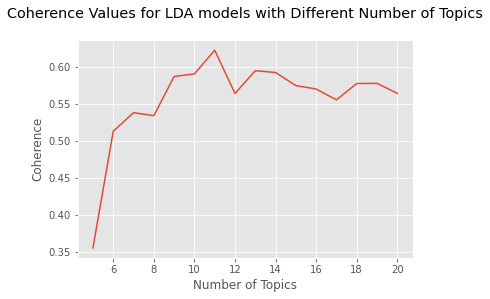

In [34]:
plt.style.use('ggplot')
plt.plot(*zip(*coherence_values))
plt.title('Coherence Values for LDA models with Different Number of Topics\n')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.show()